<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/ARIMA_Oil_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.3 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df_Oil_InUSD=pd.read_csv('/content/drive/MyDrive/dissertation/df_Oil_InUSD.csv')
df_Oil_InUSD['Date'] = pd.to_datetime(df_Oil_InUSD['Date'])

df_Oil_InUSD=df_Oil_InUSD.set_index('Date')
df_Oil_InUSD

,Original_Oil_Price
Date,
2020-01-02,67.12
2020-01-03,69.38
2020-01-06,70.87
2020-01-07,69.60
2020-01-08,69.58
...,...
2023-06-27,75.15
2023-06-28,74.38
2023-06-29,74.34


In [5]:
df_Oil_InUSD['Original_Oil_Price_Pct_Change']=df_Oil_InUSD['Original_Oil_Price'].pct_change()
df_Oil_InUSD['Original_Oil_Price_Pct_Change_diff']=df_Oil_InUSD['Original_Oil_Price'].pct_change().diff()

In [6]:
# Define the start and end dates for train and test data
train_start_date = pd.to_datetime('2018-01-01')
train_end_date = pd.to_datetime('2022-12-31')
test_start_date = pd.to_datetime('2023-01-01')


In [7]:
train_data_oil = df_Oil_InUSD[(df_Oil_InUSD.index >= train_start_date) & (df_Oil_InUSD.index <= train_end_date)]
test_data_oil = df_Oil_InUSD[df_Oil_InUSD.index >= test_start_date]
train_data_oil.head(5)

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff
Date,,,
2020-01-02,67.12,NaN,NaN
2020-01-03,69.38,0.033671,NaN
2020-01-06,70.87,0.021476,-0.012195
2020-01-07,69.60,-0.017920,-0.039396
2020-01-08,69.58,-0.000287,0.017633


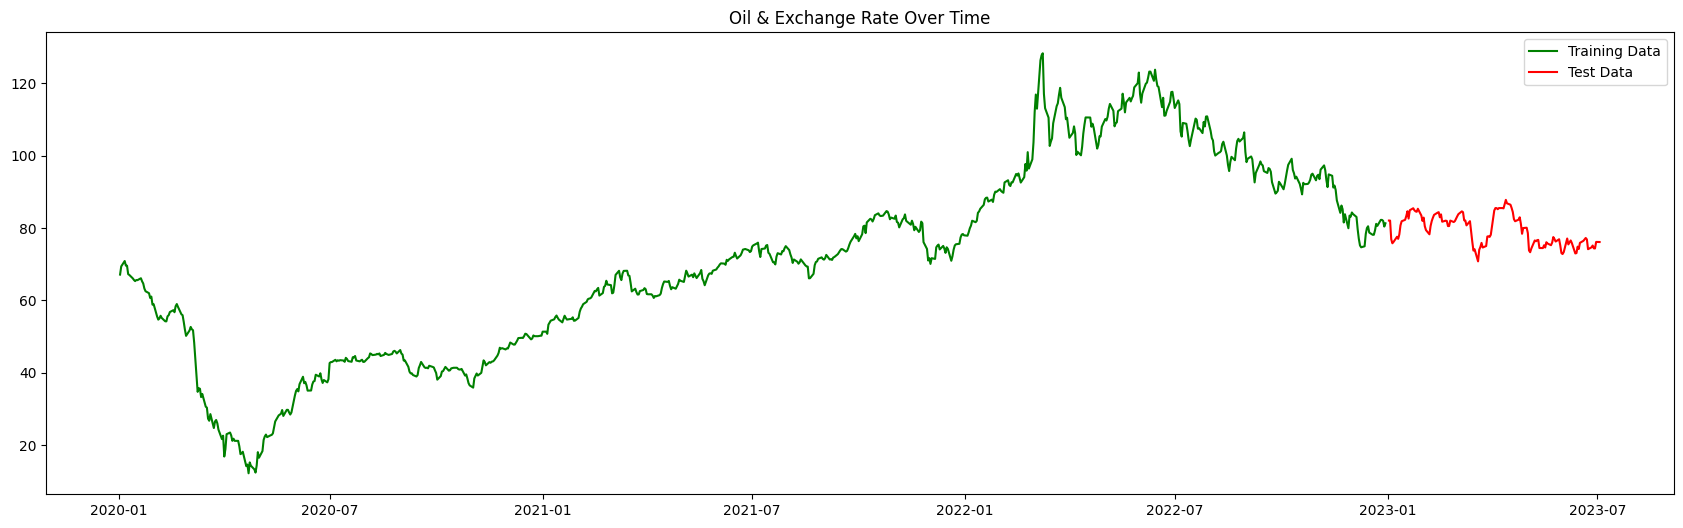

In [8]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data_oil.index, train_data_oil['Original_Oil_Price'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data_oil.index, test_data_oil['Original_Oil_Price'], color='red', label='Test Data')

plt.title('Oil & Exchange Rate Over Time')
plt.legend()
plt.show()


In [9]:
from statsmodels.tsa.stattools import adfuller

def perform_adfuller(series):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(series)

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Print the results
    print("Augmented Dickey-Fuller Test:")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")

    # Check the p-value against a significance level (e.g., 0.05) to determine stationarity
    if p_value <= 0.05:
        print("The time series is stationary.")
    else:
        print("The time series is non-stationary.")



In [10]:
print('Training data shape Oil: ', train_data_oil.shape)
print('Test data shape Oil: ', test_data_oil.shape)

Training data shape Oil:  (782, 3)
Test data shape Oil:  (131, 3)


In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax,zero=False)
    plt.title('ACF')
    plt.show()

def plot_pacf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax,zero=False,alpha=0.05)
    plt.title('PACF')
    plt.show()


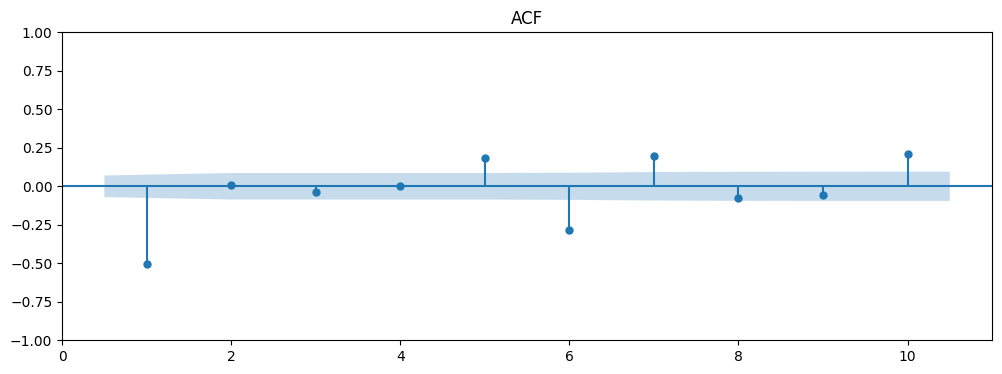

In [12]:
plot_acf_values(train_data_oil['Original_Oil_Price_Pct_Change_diff'].dropna(), lags=10)


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


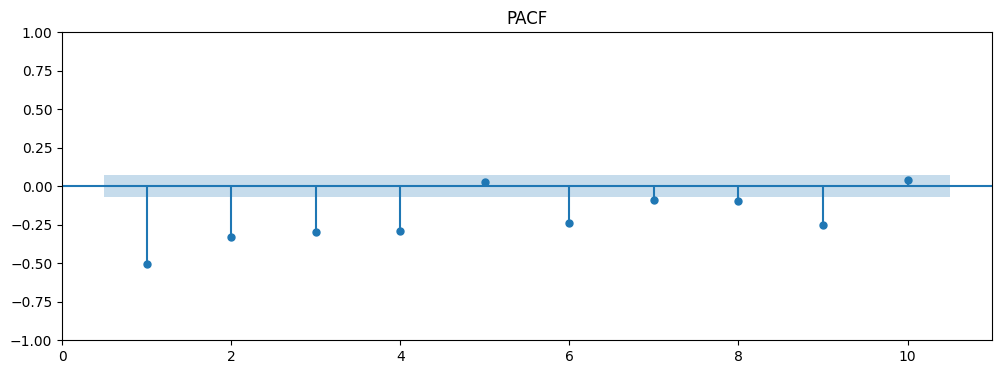

In [13]:
plot_pacf_values(train_data_oil['Original_Oil_Price_Pct_Change_diff'].dropna(), lags=10)


In [14]:
import warnings
warnings.filterwarnings("ignore")


In [19]:
train_data_oil

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff
Date,,,
2020-01-02,67.12,NaN,NaN
2020-01-03,69.38,0.033671,NaN
2020-01-06,70.87,0.021476,-0.012195
2020-01-07,69.60,-0.017920,-0.039396
2020-01-08,69.58,-0.000287,0.017633
...,...,...,...
2022-12-26,82.23,0.020477,0.027378
2022-12-27,82.23,0.000000,-0.020477
2022-12-28,81.96,-0.003283,-0.003283


In [22]:
from statsmodels.tsa.arima.model import ARIMA

def arima_model_fit(dataframe, p, d, q, exog=None):
    model = ARIMA(dataframe, order=(p,d,q), exog=exog)
    model_fit = model.fit()
    return model_fit

In [40]:
oil_model_fit=arima_model_fit(train_data_oil['Original_Oil_Price_Pct_Change_diff'].dropna(),5,0,3)
oil_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:     Original_Oil_Price_Pct_Change_diff   No. Observations:                  780
Model:                                 ARIMA(5, 0, 3)   Log Likelihood                1536.068
Date:                                Wed, 05 Jul 2023   AIC                          -3052.137
Time:                                        07:48:52   BIC                          -3005.544
Sample:                                    01-06-2020   HQIC                         -3034.216
                                         - 12-30-2022                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.004e-06      0.000     -0.008      0.993      -0.000       0.000
ar.L1         -1.4157      0.032    -44.181      0.000      -1.479      -1.353
ar.L2         -0.9256      0.060    -15.468      0.000      -1.043      -0.808
ar.L3         -0.2255      0.065     -3.444      0.001      -0.354      -0.097
ar.L4         -0.1576      0.047     -3.322      0.001      -0.251      -0.065
ar.L5          0.0516      0.026      1.964      0.049       0.000       0.103
ma.L1          0.5329      0.026     20.331      0.000       0.482       0.584
ma.L2         -0.4233      0.026    -16.036      0.000      -0.475      -0.372
ma.L3         -0.7832      0.022    -36.260      0.000      -0.826      -0.741
sigma2         0.0011   2.09e-05     54.377      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             10490.58
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.72
Prob(H) (two-sided):                  0.00   Kurtosis:                        20.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

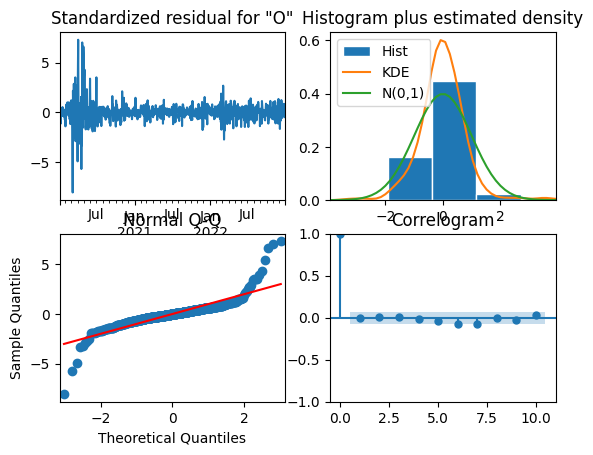

In [24]:
oil_model_fit.plot_diagnostics()
plt.show()


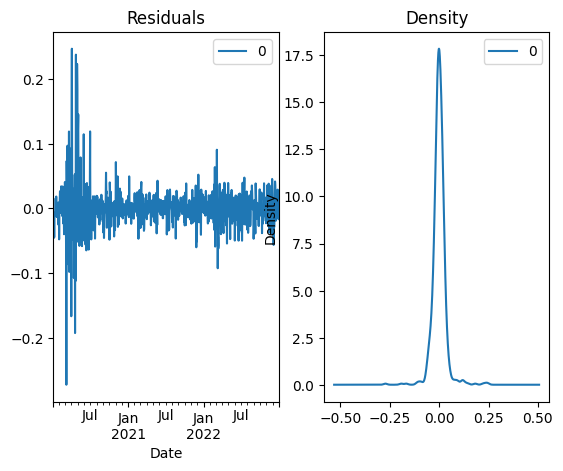

In [25]:
# Plot residual errors
residuals = pd.DataFrame(oil_model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [26]:
# Get in-sample predictions
training_data_predictions = oil_model_fit.get_prediction(start=train_data_oil.dropna().index.min(),
                                                      end=train_data_oil.dropna().index.max(),
                                                      dynamic=False)

train_data_oil[['lower Oil predictions','Higher Oil predictions']] = training_data_predictions.conf_int()

# Create a new column for the predicted values
train_data_oil['Oil predictions'] = training_data_predictions.predicted_mean
train_data_oil

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff,lower Oil predictions,Higher Oil predictions,Oil predictions
Date,,,,,,
2020-01-02,67.12,NaN,NaN,NaN,NaN,NaN
2020-01-03,69.38,0.033671,NaN,NaN,NaN,NaN
2020-01-06,70.87,0.021476,-0.012195,-0.096499,0.096497,-0.000001
2020-01-07,69.60,-0.017920,-0.039396,-0.078165,0.090106,0.005971
2020-01-08,69.58,-0.000287,0.017633,-0.050665,0.109060,0.029198
...,...,...,...,...,...,...
2022-12-26,82.23,0.020477,0.027378,-0.067825,0.064415,-0.001705
2022-12-27,82.23,0.000000,-0.020477,-0.079203,0.053037,-0.013083
2022-12-28,81.96,-0.003283,-0.003283,-0.065574,0.066666,0.000546


In [27]:
# Get in-sample predictions
testing_data_forecast = oil_model_fit.get_forecast(steps=len(test_data_oil), alpha=0.05)

test_data_oil[['lower Oil predictions','Higher Oil predictions']] = testing_data_forecast.conf_int()

# Create a new column for the predicted values
test_data_oil['Oil predictions'] = testing_data_forecast.predicted_mean
test_data_oil

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff,lower Oil predictions,Higher Oil predictions,Oil predictions
Date,,,,,,
2023-01-02,82.05,0.009349,-0.001846,-0.075017,0.057223,-0.008897
2023-01-03,82.05,0.000000,-0.009349,-0.090846,0.085555,-0.002645
2023-01-04,76.88,-0.063010,-0.063010,-0.086836,0.090050,0.001607
2023-01-05,75.77,-0.014438,0.048572,-0.091936,0.085080,-0.003428
2023-01-06,76.15,0.005015,0.019453,-0.082619,0.096477,0.006929
...,...,...,...,...,...,...
2023-06-27,75.15,0.006698,-0.000181,-0.096520,0.096477,-0.000022
2023-06-28,74.38,-0.010246,-0.016944,-0.096486,0.096511,0.000013
2023-06-29,74.34,-0.000538,0.009708,-0.096502,0.096495,-0.000004


In [28]:
df_oil= pd.concat([train_data_oil, test_data_oil])
df_oil.head(5)

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff,lower Oil predictions,Higher Oil predictions,Oil predictions
Date,,,,,,
2020-01-02,67.12,NaN,NaN,NaN,NaN,NaN
2020-01-03,69.38,0.033671,NaN,NaN,NaN,NaN
2020-01-06,70.87,0.021476,-0.012195,-0.096499,0.096497,-0.000001
2020-01-07,69.60,-0.017920,-0.039396,-0.078165,0.090106,0.005971
2020-01-08,69.58,-0.000287,0.017633,-0.050665,0.109060,0.029198


In [29]:
def Transform_OriginalValue(df,PredictedValue,Number_pct_change,original):
    initial_value = df[original][0]
    df['reversediff']=df[Number_pct_change].shift(1) + df[PredictedValue]
    initial_value = df[original][0]
    df.dropna(subset=[Number_pct_change], inplace=True)
    first_date = df.index[0]
    df.loc[df.index == first_date, 'reversediff'] = df.loc[df.index == first_date, Number_pct_change]
    df[original+'Predicted'] = (df['reversediff'] + 1).cumprod() * initial_value
    df = df.drop('reversediff', axis=1)



In [30]:
Transform_OriginalValue(df_oil,'Oil predictions','Original_Oil_Price_Pct_Change','Original_Oil_Price')

In [31]:
test_data_oil=df_oil[df_oil.index >= test_start_date]
test_data_oil.head(5)

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff,lower Oil predictions,Higher Oil predictions,Oil predictions,reversediff,Original_Oil_PricePredicted
Date,,,,,,,,
2023-01-02,82.05,0.009349,-0.001846,-0.075017,0.057223,-0.008897,0.002298,132.316584
2023-01-03,82.05,0.000000,-0.009349,-0.090846,0.085555,-0.002645,0.006704,133.203618
2023-01-04,76.88,-0.063010,-0.063010,-0.086836,0.090050,0.001607,0.001607,133.417629
2023-01-05,75.77,-0.014438,0.048572,-0.091936,0.085080,-0.003428,-0.066438,124.553585
2023-01-06,76.15,0.005015,0.019453,-0.082619,0.096477,0.006929,-0.007509,123.618289


In [32]:
train_data_oil=df_oil[df_oil.index < test_start_date]
train_data_oil.head(5)

,Original_Oil_Price,Original_Oil_Price_Pct_Change,Original_Oil_Price_Pct_Change_diff,lower Oil predictions,Higher Oil predictions,Oil predictions,reversediff,Original_Oil_PricePredicted
Date,,,,,,,,
2020-01-03,69.38,0.033671,NaN,NaN,NaN,NaN,0.033671,69.380000
2020-01-06,70.87,0.021476,-0.012195,-0.096499,0.096497,-0.000001,0.033670,71.716027
2020-01-07,69.60,-0.017920,-0.039396,-0.078165,0.090106,0.005971,0.027446,73.684378
2020-01-08,69.58,-0.000287,0.017633,-0.050665,0.109060,0.029198,0.011277,74.515349
2020-01-09,67.24,-0.033630,-0.033343,-0.064547,0.086933,0.011193,0.010906,75.327994


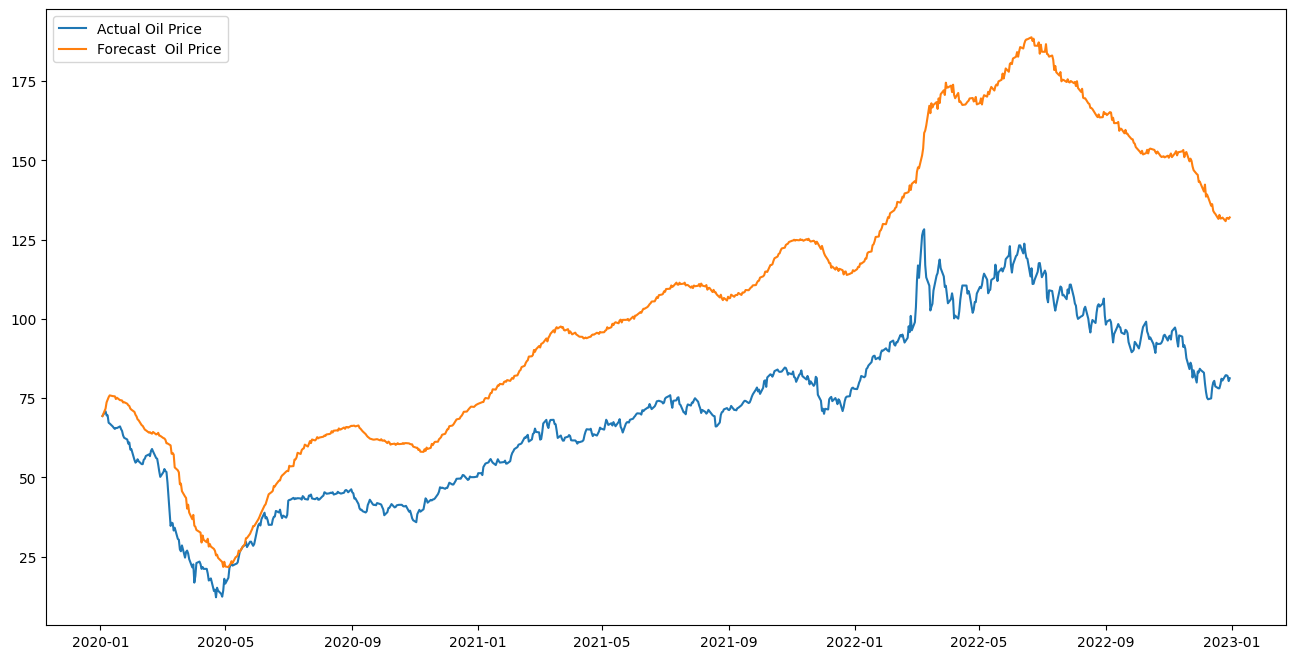

In [33]:
plt.figure(figsize=(16,8))
plt.plot(train_data_oil['Original_Oil_Price'],label="Actual Oil Price")
plt.plot(train_data_oil['Original_Oil_PricePredicted'],label="Forecast  Oil Price")
plt.legend(loc="upper left")

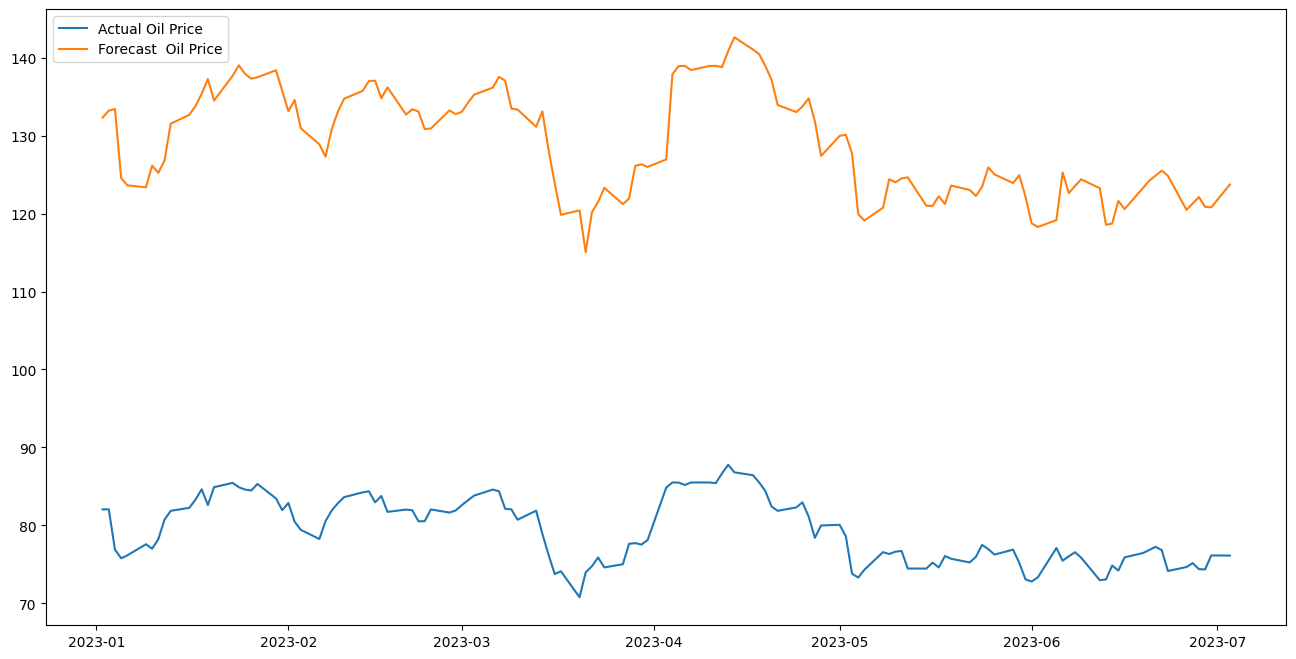

In [34]:
plt.figure(figsize=(16,8))
plt.plot(test_data_oil['Original_Oil_Price'],label="Actual Oil Price")
plt.plot(test_data_oil['Original_Oil_PricePredicted'],label="Forecast  Oil Price")
plt.legend(loc="upper left")

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"Mean Absolute Error": mae, "Mean Squared Error": mse, "Root Mean Squared Error": rmse, "Mean Absolute Percentage Error": mape}



In [36]:
metrics = calculate_metrics(test_data_oil['Original_Oil_Price'], test_data_oil['Original_Oil_PricePredicted'])
metrics

{'Mean Absolute Error': 49.664395477933596,
 'Mean Squared Error': 2477.1859174700367,
 'Root Mean Squared Error': 49.771336303840954,
 'Mean Absolute Percentage Error': 62.61420551877259}